# Earthquakes happenning in last month around the world

Earthquakes are the worst of the natural calamities. It can bring massive destruction. Below you could see some visualizations talking about the recent earthquake data.

In [3]:
#Relevnat Imports 
%matplotlib inline
import os
import sys
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Importing the dataset and cleaning.

df = pd.read_csv("https://raw.githubusercontent.com/ZahraMalwi/zmalwi.github.io/master/IS445_Part1_Earthquake.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-12-02T02:26:57.631Z,50.988400,179.614500,10.00,5.30,mww,NaN,49.0,0.913,0.80,...,2021-12-02T02:44:42.439Z,"278 km WSW of Adak, Alaska",earthquake,6.4,1.90,0.06,27.0,reviewed,us,us
1,2021-12-02T02:03:33.070Z,19.501167,-155.659164,2.79,3.18,ml,49.0,55.0,NaN,0.22,...,2021-12-02T02:40:58.338Z,"22 km ENE of Honaunau-Napoopoo, Hawaii",earthquake,0.4,0.55,3.41,36.0,automatic,hv,hv
2,2021-12-02T01:04:11.579Z,60.046400,-141.595800,3.80,3.10,ml,NaN,NaN,NaN,0.81,...,2021-12-02T01:17:39.055Z,"118 km WNW of Yakutat, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2021-12-02T00:47:12.770Z,19.202667,-155.396668,31.90,2.67,md,32.0,172.0,NaN,0.09,...,2021-12-02T00:50:25.360Z,"8 km E of P?hala, Hawaii",earthquake,0.7,0.86,0.91,5.0,automatic,hv,hv
4,2021-12-01T23:55:08.176Z,54.985200,-157.524500,15.50,3.80,ml,NaN,NaN,NaN,0.63,...,2021-12-02T00:50:54.392Z,"145 km SE of Perryville, Alaska",earthquake,NaN,1.00,NaN,NaN,reviewed,ak,ak


In [5]:
df.dtypes
#Since it will get changed, mentioning the previous data type through snippet 
len(df.index)

326

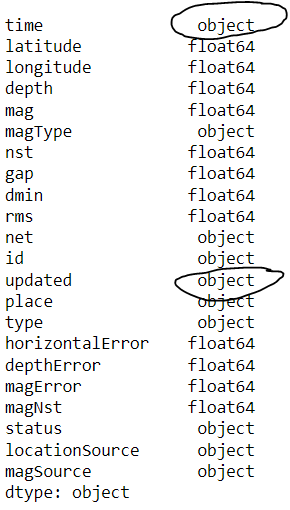

In [6]:
#Changing the datetime details from string object to datetime 

df["time"]= pd.to_datetime(df["time"])
df["updated"]= pd.to_datetime(df["updated"])
df.dtypes


time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated            datetime64[ns, UTC]
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object

In [7]:
df['time'].min().utcnow().timestamp() 

1638906818.654065

Discussing the metadata
    
1. *NST* - Number of seismic stations which reported P- and S-arrival times for this earthquake

It is the column which is missing high number of data and hence without an expert talking about the field its best to drop NST. And since it might compromise with the number of rows to work with its not wise to drop the the data rows having missing NST values.

2. *Magnitude type* can be explained by the following link which I also referred : https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types?qt-science_center_objects=0#qt-science_center_objects

3. *dmin*

4. *rms*

In [8]:
df = df.drop(['nst'], axis =1)
df.head()

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-12-02 02:26:57.631000+00:00,50.988400,179.614500,10.00,5.30,mww,49.0,0.913,0.80,us,...,2021-12-02 02:44:42.439000+00:00,"278 km WSW of Adak, Alaska",earthquake,6.4,1.90,0.06,27.0,reviewed,us,us
1,2021-12-02 02:03:33.070000+00:00,19.501167,-155.659164,2.79,3.18,ml,55.0,NaN,0.22,hv,...,2021-12-02 02:40:58.338000+00:00,"22 km ENE of Honaunau-Napoopoo, Hawaii",earthquake,0.4,0.55,3.41,36.0,automatic,hv,hv
2,2021-12-02 01:04:11.579000+00:00,60.046400,-141.595800,3.80,3.10,ml,NaN,NaN,0.81,ak,...,2021-12-02 01:17:39.055000+00:00,"118 km WNW of Yakutat, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2021-12-02 00:47:12.770000+00:00,19.202667,-155.396668,31.90,2.67,md,172.0,NaN,0.09,hv,...,2021-12-02 00:50:25.360000+00:00,"8 km E of P?hala, Hawaii",earthquake,0.7,0.86,0.91,5.0,automatic,hv,hv
4,2021-12-01 23:55:08.176000+00:00,54.985200,-157.524500,15.50,3.80,ml,NaN,NaN,0.63,ak,...,2021-12-02 00:50:54.392000+00:00,"145 km SE of Perryville, Alaska",earthquake,NaN,1.00,NaN,NaN,reviewed,ak,ak


In [9]:
#Saving the processed to dataset to use in other platforms
import os
os.getcwd()
df.to_csv('IS445_Part1_Earthquake_Processed.csv', index=False)
#Saved under : '/home/zmalwi2/zmalwi.github.io'

In [8]:
!conda install --yes cartopy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



###  1. The following graph below shows the earthquake affected areas around the world in the past month.

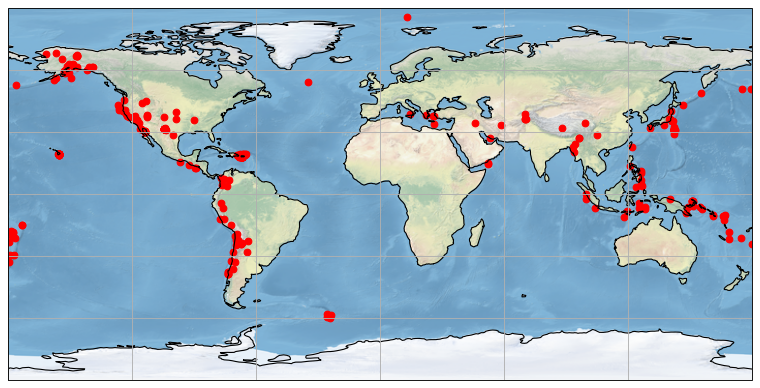

In [10]:
import cartopy
fig = plt.figure(figsize = (12, 16), dpi =80)
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

ax.scatter(df['longitude'],df['latitude'], c = 'red')
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_global()


###  2. Tried to improve the above graph, and use the Mollewiede projection.

The most difficult task for me here was to understand how the latitude and longitude change in accordance to Molleweide projection. Below is the latest code I used and failed terribly as could not get the right projections, even after investing 2 hours. But, I tried.

326


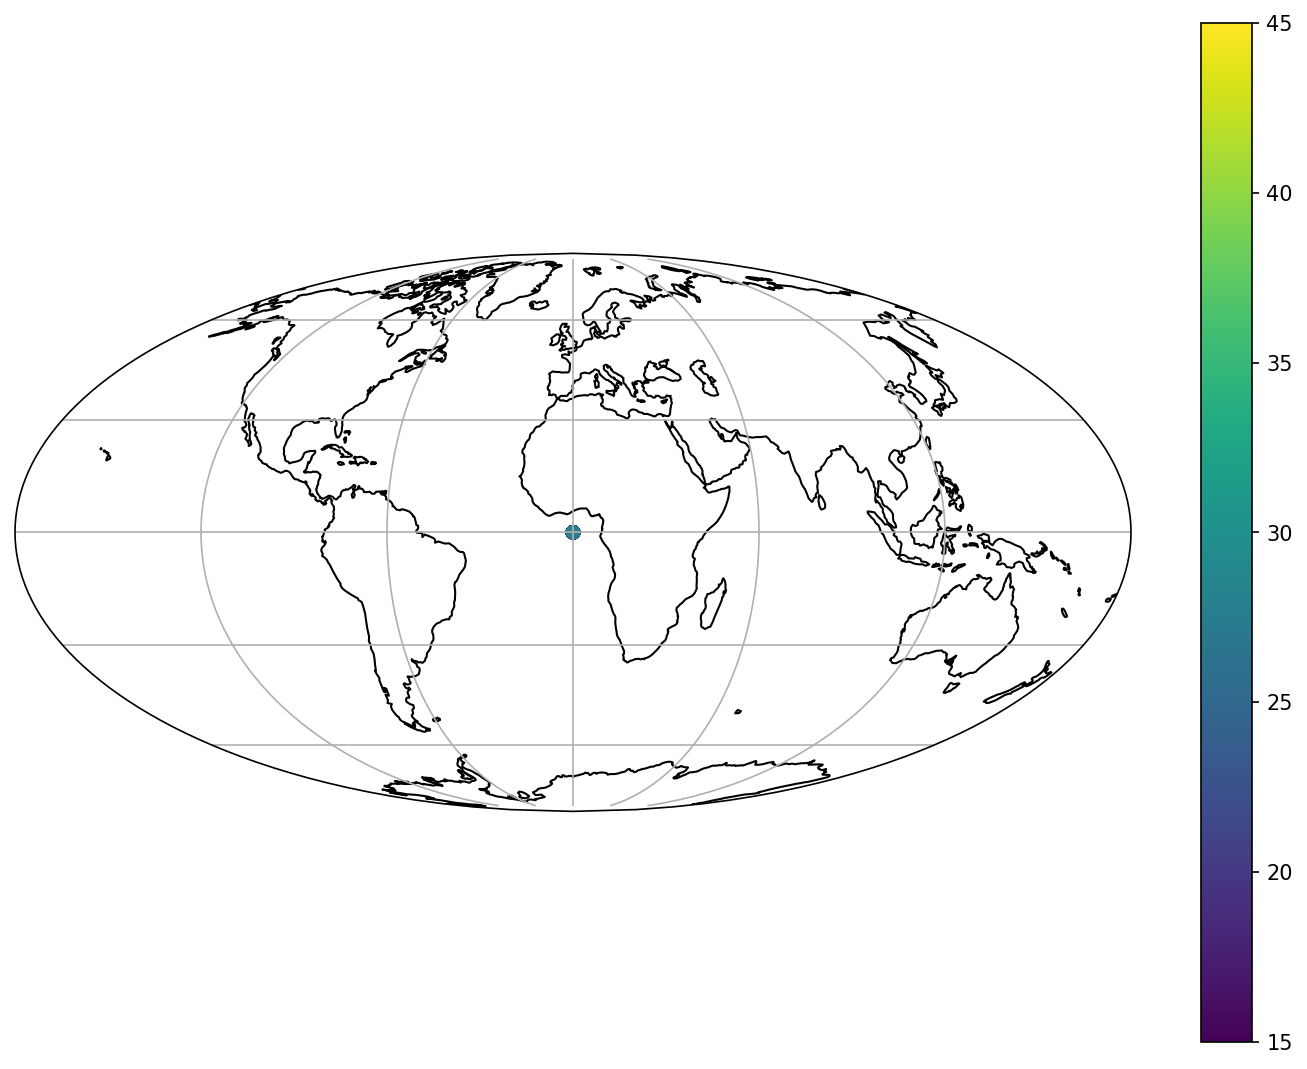

In [11]:
import numpy as np 

fig = plt.figure(figsize = (12,9), dpi = 150)
min_marker_size = 6
count = 0
x , y , msize = [] ,[] ,[]

for lon, lat, mag in zip(df['longitude'],df['latitude'], df['mag']):
    x.append(lon) 
    y.append(lat)
    msize.append(mag * min_marker_size)
    count = count + 1
    
for i in range(len(x)):
    if x[i]>180:
        x[i] -= 360

for i in range(len(y)):
    if y[i]>180:
        y[i] -= 360        
        
ax = fig.add_subplot(111, projection=cartopy.crs.Mollweide())
ax.coastlines()
ax.gridlines()
ax.set_global()
ax.grid(True)
sc = ax.scatter(np.array(x)*np.pi/180., np.array(y)*np.pi/180., c = msize)

print(count) #To know how many iterations it is going
plt.colorbar(sc)

#ax.scatter(df['longitude'],df['latitude'])

### 3. A very chaotic representation of earthquakes below, happening around in past month, this was an experiment graph and not expressing anything legit through it.

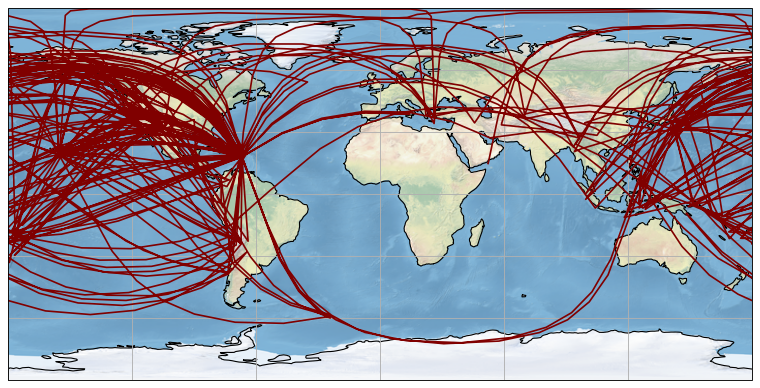

In [12]:
import cartopy
fig = plt.figure(figsize = (12, 16), dpi =80)
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

ax.plot(df['longitude'],df['latitude'],c = 'maroon', transform=cartopy.crs.Geodetic())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_global()


In [13]:
#For basemap to work 
os.environ['PROJ_LIB'] = '/Users/mb/anaconda3/envs/worklab/share/proj'

*Explored basemap as suggested in the class, after doing some work with Cortapy* 

In [14]:
#The projetion of earthquakes according to the scale and size of magnitude

from datetime import datetime
from mpl_toolkits.basemap import Basemap, supported_projections
from ipywidgets import interact, interact_manual, FloatSlider

### 4.Changing the Latitude and Longitude will shift the world map and you can see the affected area

In [36]:
#Interactivity; Using ipywidgets

lat_slider = FloatSlider(min= df['latitude'].min(), max = df['latitude'].max(), step=0.1, continuous_update=False)
lon_slider = FloatSlider(min= df['longitude'].min(), max = df['longitude'].max(), step=0.1, continuous_update=False)
hour_slider = FloatSlider(min=-12, max=12, step=1/60, continuous_update=False)


In [51]:
@interact(lat_0=lat_slider, lon_0=lon_slider,
                 delta_hours=hour_slider,
                 title='World Map with night and day')
def show_map(lat_0=0, lon_0=0, delta_hours=0, title=''):
    "Show a world map."
    
    plt.figure(figsize=(40,6), dpi = 120)
    map = Basemap(projection= 'mill', lat_0 = lat_0, lon_0 = lon_0, resolution='c')

    
    map.drawcoastlines() 

    # Plot countries.
    map.drawcountries() # linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
    map.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60), labels=[0, 0, 0, 1])
    
    
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='orange', lake_color='aqua')

    # Shade the night areas, with alpha transparency so the
    
    date = datetime.utcnow().timestamp() + delta_hours * 3600
    date= datetime.fromtimestamp(date)
    map.nightshade(date, alpha=0.35)
    x,y = map(df['longitude'],df['latitude'])
    map.plot(x, y, 'ro', markersize= 2)
    
    #labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
    #for label, xpt, ypt in zip(df['place'], x, y):
        #plt.text(xpt+10000, ypt+5000, label)
 
    
#plt.title('%s %s (UTC)' % (title, date.isoformat()[:19]))
    plt.title(title)
    plt.show()

Limitation of this graph : I tried labelling the affected area when the visulization shifts with respect to latitude and longitude slider, but it somehow could not understand ho wto connect the widget.
Also, this interactivity is very slow, which I have not been able to debug.

### 5.Basemap with robin projection, which can be very misleading if lat and log not changed

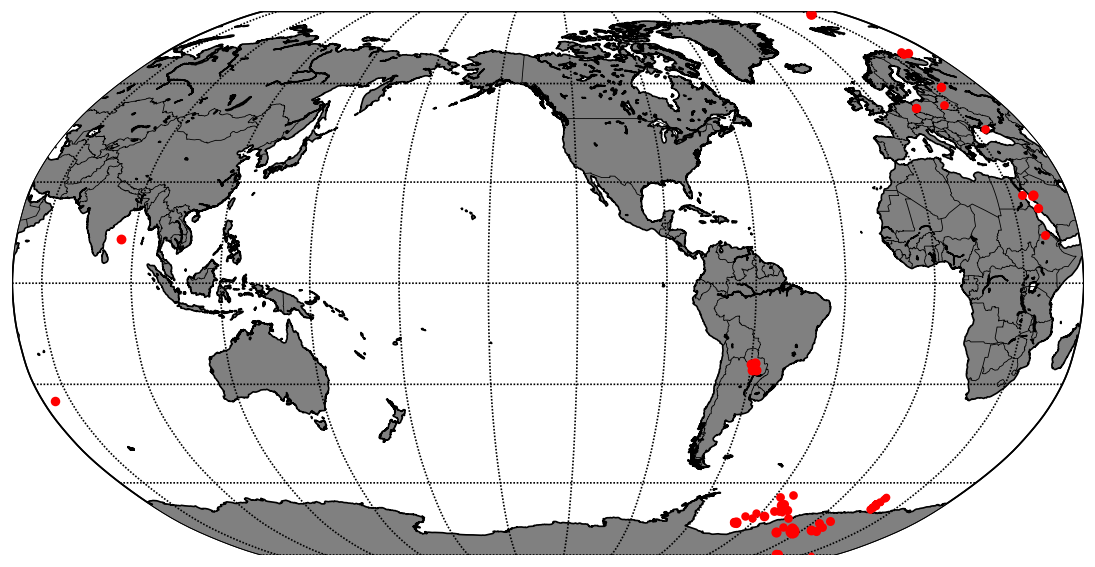

In [22]:
#Basemap with robin projection

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
plt.figure(figsize=(40,6), dpi = 120)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1
for lon, lat, mag in zip(df['latitude'], df['longitude'], df['mag']):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    eq_map.plot(x, y, 'ro', markersize=msize)
 
plt.show()

The limitation I see here is that since it is a robin projection, the latitude and longitudes need to change in that manner, otherwise clearly this visualization miscommunicated the detail.

### 6.HEATMAP!!!!

In [ ]:
#Creating the heatmap using google maps 

In [48]:
!pip install gmplot

In [49]:
import gmplot


gmap = gmplot.GoogleMapPlotter(0, 0, 2)
# plot heatmap
gmap.heatmap(df['latitude'], df['longitude'])

In [50]:
gmap.draw("Earthquake_heatmap.html")
#The snippet below is an example for google map html file and this html link takes there.


https://jupyterhub.ischool.illinois.edu/jupyter/user/zmalwi2/view/zmalwi.github.io/Earthquake_heatmap.html

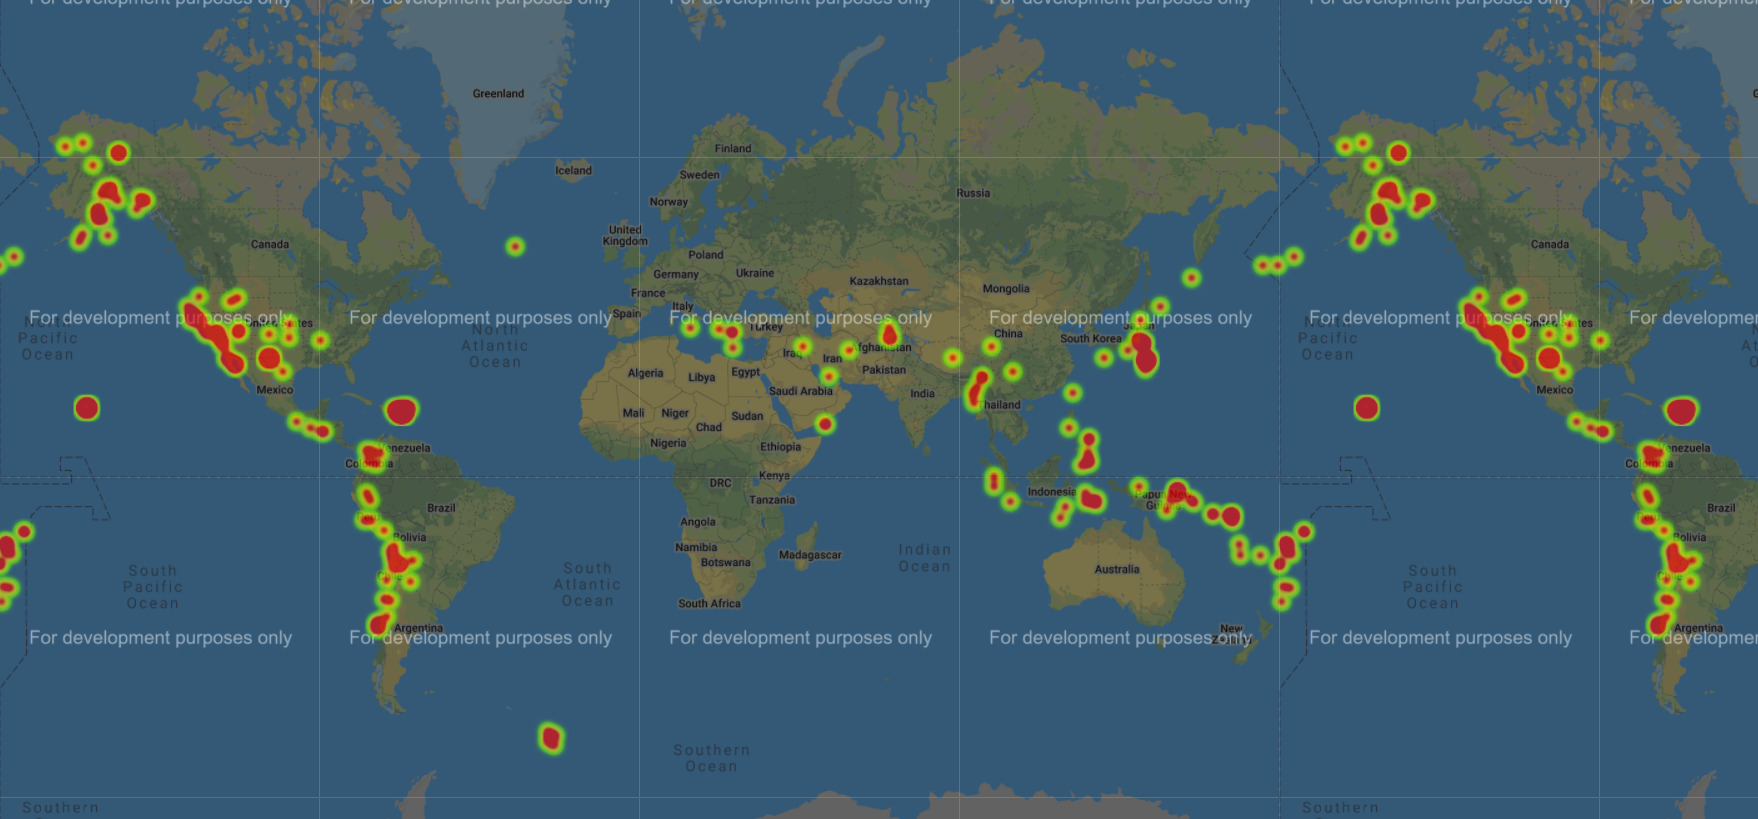

#### I converted the time field to datetime, but could not really parse and use it, that could be my futurework!

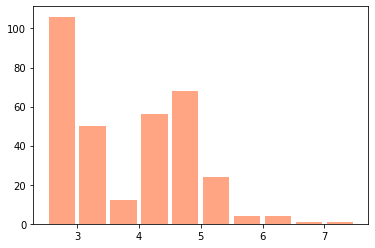

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['mag'], bins='auto', color= 'coral',
                            alpha=0.7, rwidth=0.85)
plt.show() 


Lastly, this very very basic visualization I made was for inference purposes. Maximum earthquakes have been observed were of very less magnitude, ranging between 0 to 3 ritchter scale.

# LINK TO OBSERVABLE

https://observablehq.com/@689ee68cec69d5c6/is-445-final-part-1-earthquake-data

Unable to share the link through uplaod section, so sharing the link here!